# **City of Chicago Traffic Crashes**

<div style="width: 2000px; overflow: hidden;">
  <header style="height: 5in; display: flex; justify-content: center; align-items: center;">
    <img src="..\chicago2.png" alt="Chicago skyline" style="height: 5in; width: 100%; object-fit: cover;"/>
  </header>
</div>


# **1. Business Understanding**

# **2. Data Understanding**

### **a) Imported relevant modules**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### **b) Loading the dataset**

In [220]:
#from google.colab import drive


# Mount your Google Drive
#drive.mount('/content/drive')

# Now you can read the CSV file
#df = pd.read_csv('/content/drive/My Drive/Traffic_Crashes_-_Crashes_20241007.csv')  # Updated path
#df.head()

In [11]:
#read vehicle dataset
chunk_size = 100000  
data_chunks = []

for chunk in pd.read_csv('..\\Traffic_Crashes_-_Vehicles_20241010.csv', chunksize=chunk_size, low_memory=False):
    data_chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
vehicles = pd.concat(data_chunks, ignore_index=True)
vehicles_sample = vehicles.sample(frac=0.5, random_state=42)

In [12]:
#read crash dataset
chunk_size = 100000  
data_chunks = []

for chunk in pd.read_csv('..\\Traffic_Crashes_-_Crashes_20241010.csv', chunksize=chunk_size, low_memory=False):
    data_chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
crash = pd.concat(data_chunks, ignore_index=True)
crash_sample = crash.sample(frac=0.5, random_state=42)

In [13]:
#read people dataset
chunk_size = 100000  
data_chunks = []

for chunk in pd.read_csv('..\\Traffic_Crashes_-_People_20241010.csv', chunksize=chunk_size, low_memory=False):
    data_chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
people = pd.concat(data_chunks, ignore_index=True)
people_sample = people.sample(frac=0.5, random_state=42)

In [14]:
print('CRASH:', crash_sample.shape)
print('VEHICLE:', vehicles_sample.shape)
print('PEOPLE:',people_sample.shape)

CRASH: (440658, 48)
VEHICLE: (898900, 71)
PEOPLE: (967778, 29)


In [82]:
# Merge the sampled datasets on 'CRASH_RECORD_ID'
crash.rename(columns={'crash_record_id': 'CRASH_RECORD_ID'}, inplace=True)
# Merging 'CRASH' with 'VEHICLE' first
merged = pd.merge(left=crash_sample, right=vehicles_sample, on='CRASH_RECORD_ID')

# Merge the result with 'PEOPLE' dataset
data = pd.merge(left=merged, right=people_sample, on='CRASH_RECORD_ID')
data.head()


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,e336ff880ce26035500f68e3afd50d4e6e1a989bdea74e...,NaN,01/18/2017 04:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,NaN,NONE,UNKNOWN,NORMAL,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,UNKNOWN/NA,TEST NOT OFFERED,NaN,NaN
1,d013ae6815593f74b3169af0a9fc1508931f2dad7a45de...,NaN,04/07/2018 06:30:00 PM,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6300826e5eeb257738bd1ce5889b5a9231adc801f9ff24...,NaN,08/26/2023 10:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,36059a40e4f33cc815ed51f1eacc3ccc4ea804bfeccf07...,NaN,06/21/2019 04:00:00 PM,40,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,36059a40e4f33cc815ed51f1eacc3ccc4ea804bfeccf07...,NaN,06/21/2019 04:00:00 PM,40,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


Based on the chart, the two distributions look very similar, which is a good indication that the stratified sampling has successfully preserved the overall distribution of the original dataset. This close alignment means the sample is representative of the original data, which is exactly what we aim for with stratified sampling.

### **c) Data Shape**

In [83]:
print('Our data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Our data has 507772 rows and 146 columns


### **d) Data Description**

In [84]:
data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_ID_y,SEAT_NO,AGE,BAC_RESULT VALUE
count,507772.000000,116392.000000,507772.000000,507770.000000,507772.000000,507772.000000,507772.000000,507772.000000,507772.000000,507772.000000,...,495894.000000,4983.000000,570.000000,18.000000,797.000000,1198.000000,4.970010e+05,104237.000000,360390.000000,624.000000
mean,28.949662,6.442264,3647.573781,1234.859862,2.200421,0.321613,0.002064,0.031233,0.180506,0.107810,...,1.371767,10084.075055,46.505263,44.000000,52.191970,25.237896,9.128539e+05,4.162342,37.794728,0.174776
std,5.615197,905.622800,2825.990434,699.749052,0.647037,0.855393,0.056236,0.229016,0.641568,0.467324,...,1.400421,5859.442914,15.764105,13.664036,41.492259,751.341578,5.282352e+05,2.218431,17.077850,0.110186
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,24.000000,1.000000,1.000000,4.000000e+00,1.000000,-59.000000,0.000000
25%,30.000000,2.000000,1206.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4874.500000,40.000000,33.000000,35.000000,2.000000,4.556600e+05,3.000000,25.000000,0.130000
50%,30.000000,2.000000,3200.000000,1134.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,9936.000000,53.000000,50.500000,53.000000,3.000000,9.027100e+05,3.000000,35.000000,0.180000
75%,30.000000,4.000000,5529.000000,1814.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,15102.500000,53.000000,53.000000,65.000000,5.000000,1.373077e+06,6.000000,50.000000,0.220000
max,99.000000,218474.000000,13799.000000,6100.000000,14.000000,17.000000,4.000000,8.000000,16.000000,10.000000,...,99.000000,20212.000000,120.000000,75.000000,999.000000,26009.000000,1.832851e+06,12.000000,110.000000,1.000000


In [85]:
data.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE_x',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE',
       ...
       'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
       'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE'],
      dtype='object', length=146)

Our data seems to prescribe conditions surrounding a crash as well as the crash's outcome.

**Our Target Variable is PRIM_CONTRIBUTORY_CAUSE hence this is a classification problem**

**PRIM_CONTRIBUTORY_CAUSE: Primary cause of the crash**




In [86]:
for i in data['PRIM_CONTRIBUTORY_CAUSE'].unique():
    prim_percentage = (data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()[i]/data['PRIM_CONTRIBUTORY_CAUSE'].value_counts().sum())*100
    sec_percentage = (data['SEC_CONTRIBUTORY_CAUSE'].value_counts()[i]/data['SEC_CONTRIBUTORY_CAUSE'].value_counts().sum())*100 if i in data['SEC_CONTRIBUTORY_CAUSE'].unique() else None
    print(f"{i}, {prim_percentage:.2f}%", end='')
    if sec_percentage is not None:
        print(f", {sec_percentage:.2f}%", end='')
    print()

OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER, 1.44%, 0.71%
UNABLE TO DETERMINE, 34.51%, 34.19%
FOLLOWING TOO CLOSELY, 11.59%, 3.25%
NOT APPLICABLE, 4.60%, 39.98%
IMPROPER OVERTAKING/PASSING, 5.35%, 1.72%
FAILING TO YIELD RIGHT-OF-WAY, 12.74%, 3.79%
PHYSICAL CONDITION OF DRIVER, 0.56%, 0.32%
FAILING TO REDUCE SPEED TO AVOID CRASH, 5.06%, 4.49%
IMPROPER LANE USAGE, 3.67%, 1.57%
DISREGARDING TRAFFIC SIGNALS, 2.72%, 0.54%
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE, 3.00%, 3.19%
IMPROPER BACKING, 3.25%, 0.70%
DISREGARDING ROAD MARKINGS, 0.13%, 0.11%
EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST, 0.16%, 0.05%
IMPROPER TURNING/NO SIGNAL, 3.65%, 1.16%
DISTRACTION - FROM INSIDE VEHICLE, 0.77%, 0.37%
DISREGARDING STOP SIGN, 1.31%, 0.33%
DISTRACTION - FROM OUTSIDE VEHICLE, 0.38%, 0.17%
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.), 0.52%, 0.32%
ROAD CONSTRUCTION/MAINTENANCE, 0.14%, 0.10%
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED), 0.

'PRIM_CONTRIBUTORY_CAUSE' and 'SEC_CONTRIBUTORY_CAUSE' are very highly correlated. Hence we will drop 'SEC_CONTRIBUTORY_CAUSE'

### **e) Duplicates**

In [87]:
data.duplicated().sum()

0

There are no duplicates in our dataset

Our dataset is quite large with several columns that seem to contain similar information. Below we inspect datatypes

### **f) Missing Values**
Next, we will look at missing data by column percentage.

In [88]:
data.isna().sum()/data.shape[0]*100

CRASH_RECORD_ID            0.000000
CRASH_DATE_EST_I          94.410287
CRASH_DATE_x               0.000000
POSTED_SPEED_LIMIT         0.000000
TRAFFIC_CONTROL_DEVICE     0.000000
                            ...    
PEDPEDAL_VISIBILITY       98.006586
PEDPEDAL_LOCATION         98.002647
BAC_RESULT                20.661242
BAC_RESULT VALUE          99.877110
CELL_PHONE_USE            99.943872
Length: 146, dtype: float64

In [89]:
percent_null = {}
for col in data.columns:
    percent_null[col] = data[col].isna().sum()/data.shape[0]*100
    if percent_null[col] > 95:
       print(col, percent_null[col])

NOT_RIGHT_OF_WAY_I 96.87300599481658
PHOTOS_TAKEN_I 98.52729177662415
STATEMENTS_TAKEN_I 97.25743050030329
DOORING_I 99.66520406796752
WORK_ZONE_I 99.42395405812057
WORK_ZONE_TYPE 99.55944794120197
WORKERS_PRESENT_I 99.86568774961991
CMRC_VEH_I 98.16157645557455
FIRE_I 99.90842346564995
EXCEED_SPEED_LIMIT_I 99.84875101423474
AREA_00_I 96.5082753676847
CMV_ID 99.01865404157772
USDOT_NO 99.48559589737125
CCMC_NO 99.89956122039025
ILCC_NO 99.91984591509575
COMMERCIAL_SRC 99.36388772913828
GVWR 99.44738977336284
CARRIER_NAME 99.05863261463807
CARRIER_STATE 99.10727649417454
CARRIER_CITY 99.12421322955971
HAZMAT_PLACARDS_I 99.9862142851516
HAZMAT_NAME 99.99724285703032
UN_NO 99.97242857030321
HAZMAT_PRESENT_I 99.27231119478822
HAZMAT_REPORT_I 99.29023262409112
HAZMAT_REPORT_NO 100.0
MCS_REPORT_I 99.28688466477081
MCS_REPORT_NO 100.0
HAZMAT_VIO_CAUSE_CRASH_I 99.28333976666693
MCS_VIO_CAUSE_CRASH_I 99.28983874652403
IDOT_PERMIT_NO 99.94938673262803
WIDE_LOAD_I 99.99212244865807
TRAILER1_WIDTH

We seem to have a lot of missing values. We will drop these

In [96]:
null_columns = [col for col in percent_null.keys() if percent_null[col] > 95]
for col in null_columns:
    if col in data.columns:
        data.drop(null_columns, axis=1, inplace = True)
    else:
        continue
print(f'Our data now has {data.shape[0]} rows and {data.shape[1]} columns')

Our data now has 507772 rows and 96 columns


### **g) Datatypes**

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507772 entries, 0 to 507771
Data columns (total 96 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                507772 non-null  object 
 1   CRASH_DATE_EST_I               28383 non-null   object 
 2   CRASH_DATE_x                   507772 non-null  object 
 3   POSTED_SPEED_LIMIT             507772 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         507772 non-null  object 
 5   DEVICE_CONDITION               507772 non-null  object 
 6   WEATHER_CONDITION              507772 non-null  object 
 7   LIGHTING_CONDITION             507772 non-null  object 
 8   FIRST_CRASH_TYPE               507772 non-null  object 
 9   TRAFFICWAY_TYPE                507772 non-null  object 
 10  LANE_CNT                       116392 non-null  float64
 11  ALIGNMENT                      507772 non-null  object 
 12  ROADWAY_SURFACE_COND          

Our dataset is quite large with several columns that seem to contain similar information.



Below we drop some columns that have limited useful information given our overall objective. First, we will combine the street information to replace our location column which has GPS coordinates


In [97]:
data['LOCATION'] = data['STREET_NO'].astype(str) + ' ' + data['STREET_DIRECTION'] + ' ' + data['STREET_NAME']
data['LOCATION'].head()

0       11300 S MICHIGAN AVE
1             3800 W 79TH ST
2          3439 W CARMEN AVE
3    5600 N LAKE SHORE DR NB
4    5600 N LAKE SHORE DR NB
Name: LOCATION, dtype: object

In [98]:
for column in data.columns:
    print(column, data[column].nunique())

CRASH_RECORD_ID 240390
CRASH_DATE_EST_I 2
CRASH_DATE_x 206796
POSTED_SPEED_LIMIT 32
TRAFFIC_CONTROL_DEVICE 19
DEVICE_CONDITION 8
WEATHER_CONDITION 12
LIGHTING_CONDITION 6
FIRST_CRASH_TYPE 18
TRAFFICWAY_TYPE 20
LANE_CNT 24
ALIGNMENT 6
ROADWAY_SURFACE_COND 7
ROAD_DEFECT 7
REPORT_TYPE 3
CRASH_TYPE 2
INTERSECTION_RELATED_I 2
HIT_AND_RUN_I 2
DAMAGE 3
DATE_POLICE_NOTIFIED 219451
PRIM_CONTRIBUTORY_CAUSE 40
SEC_CONTRIBUTORY_CAUSE 40
STREET_NO 10060
STREET_DIRECTION 4
STREET_NAME 1437
BEAT_OF_OCCURRENCE 276
NUM_UNITS 14
MOST_SEVERE_INJURY 5
INJURIES_TOTAL 17
INJURIES_FATAL 5
INJURIES_INCAPACITATING 8
INJURIES_NON_INCAPACITATING 15
INJURIES_REPORTED_NOT_EVIDENT 11
INJURIES_NO_INDICATION 38
INJURIES_UNKNOWN 1
CRASH_HOUR 24
CRASH_DAY_OF_WEEK 7
CRASH_MONTH 12
LATITUDE 124385
LONGITUDE 124382
LOCATION 131167
CRASH_UNIT_ID 329612
CRASH_DATE_y 206812
UNIT_NO 13
UNIT_TYPE 9
NUM_PASSENGERS 32
VEHICLE_ID_x 321590
MAKE 660
MODEL 1868
LIC_PLATE_STATE 52
VEHICLE_YEAR 132
VEHICLE_DEFECT 17
VEHICLE_TYPE 22
VE

In [230]:
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'CRASH_DATE','REPORT_TYPE', 'TRAFFIC_CONTROL_DEVICE',
    'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','STREET_NO','STREET_DIRECTION','STREET_NAME','DATE_POLICE_NOTIFIED',
    'BEAT_OF_OCCURRENCE','LANE_CNT','LATITUDE', 'LONGITUDE','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','SEC_CONTRIBUTORY_CAUSE',]

relevant_data = data.drop(columns = columns_to_drop, axis=1)
relevant_data.head()

,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,4437 S CICERO AVE
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,11500 S MICHIGAN AVE
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,4328 W HIRSCH ST
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,4837 S MICHIGAN AVE
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,3500 W 71ST ST


Next, we will look at missing data by column percentage.

In [231]:
relevant_data.isna().sum()/data.shape[0]*100

POSTED_SPEED_LIMIT              0.000000
DEVICE_CONDITION                0.000000
WEATHER_CONDITION               0.000000
LIGHTING_CONDITION              0.000000
FIRST_CRASH_TYPE                0.000000
TRAFFICWAY_TYPE                 0.000000
ALIGNMENT                       0.000000
ROADWAY_SURFACE_COND            0.000000
ROAD_DEFECT                     0.000000
CRASH_TYPE                      0.000000
INTERSECTION_RELATED_I         77.005348
NOT_RIGHT_OF_WAY_I             95.460225
HIT_AND_RUN_I                  68.620257
DAMAGE                          0.000000
PRIM_CONTRIBUTORY_CAUSE         0.000000
WORK_ZONE_I                    99.439343
WORK_ZONE_TYPE                 99.570648
WORKERS_PRESENT_I              99.857110
NUM_UNITS                       0.000000
MOST_SEVERE_INJURY              0.222400
INJURIES_TOTAL                  0.221037
INJURIES_FATAL                  0.221037
INJURIES_INCAPACITATING         0.221037
INJURIES_NON_INCAPACITATING     0.221037
CRASH_HOUR      

In [232]:
print([col for col in relevant_data.columns
    if relevant_data[col].isna().sum()/relevant_data.shape[0]*100 > 50])

['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']


From a review of the data, we need to distinguish between missing values where this indicates 'no' or 'negative' from situations with actual missing data.

Based on the most affected columns:

- INTERSECTION_RELATED_I - missing value seem to equal N (no).
- HIT_AND_RUN_I - missing value seem to equal N (no).
- NOT_RIGHT_OF_WAY_I - missing value seem to equal N (no).
- WORKZONE_I - missing value seem to equal N (no).
- WORK_ZONE_TYPE -- missing value seem to equal not a work zone.
- WORKERS_PRESENT_I- missing value seem to equal N (no).

Below we deal with missing values for these columns

In [233]:
columns_to_fill_with_N = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
    'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']  #columns with many missing values which should actually be N

# Fill the selected columns with 'N'
relevant_data[columns_to_fill_with_N] = relevant_data[columns_to_fill_with_N].fillna('N') #fill the columns with N

# Fill 'WORK_ZONE_TYPE' with 'Other'
relevant_data['WORK_ZONE_TYPE'] = relevant_data['WORK_ZONE_TYPE'].fillna('Other') #fill this column with Other
relevant_data.head()


,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,4437 S CICERO AVE
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,11500 S MICHIGAN AVE
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,4328 W HIRSCH ST
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,4837 S MICHIGAN AVE
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,3500 W 71ST ST


In [234]:
relevant_data.isna().sum()

POSTED_SPEED_LIMIT               0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
WORK_ZONE_I                      0
WORK_ZONE_TYPE                   0
WORKERS_PRESENT_I                0
NUM_UNITS                        0
MOST_SEVERE_INJURY             979
INJURIES_TOTAL                 973
INJURIES_FATAL                 973
INJURIES_INCAPACITATING        973
INJURIES_NON_INCAPACITATING    973
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
LOCATION                         2
dtype: int64

We can drop the remaining columns with missing values as their number is small and unlikely to affect the overall data distribution materially

In [235]:
relevant_data.dropna(inplace=True)
print('We now have {} columns with missing values'.format(relevant_data.isna().sum().sum()))

We now have 0 columns with missing values


### **i) Variable Types**

In [236]:
# Separate categorical columns
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = relevant_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 19 categorical columns and 9 continuous columns


# **3. EDA & Data Preparation**

### **a) Basic Descriptive Statistics**

- **Continuous Columns:** We will get an overview of the distribution, central tendency, and spread

In [237]:
relevant_data[continuous_columns].describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000
mean,28.424116,2.036164,0.193119,0.001157,0.020129,0.108502,13.205746,4.121147,6.640542
std,6.122032,0.451592,0.569819,0.037127,0.167706,0.424581,5.566176,1.982705,3.365398
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000
50%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000
75%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,6.000000,9.000000
max,99.000000,18.000000,21.000000,3.000000,10.000000,21.000000,23.000000,7.000000,12.000000


Our continuous data seems to have different scales across different features. Hence we may need to scale it

- **Categorical Columns:** We will get an overview of the distribution in each categorical column

In [238]:
relevant_data[categorical_columns].describe()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
count,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217
unique,8,12,6,18,20,6,7,7,2,2,2,2,3,40,2,5,2,5,211249
top,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",UNABLE TO DETERMINE,N,N,N,NO INDICATION OF INJURY,10000 W OHARE ST
freq,251204,345632,282825,101663,189346,428800,324958,350446,321339,342820,421182,307401,275548,171422,437331,437331,438661,377551,698


Some of our categorical features have a lot of categories. Hence we may need to use **target encoding** to deal with high cardinality.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with fatalities, the encoding will reflect that association. Target encoding should not alter the shape of our data.

### **c) Visualizations**

We will use visualizations to help display the relationships and patterns in our data intuitively.

- **Distribution of continuous features:**

**1) Histograms**

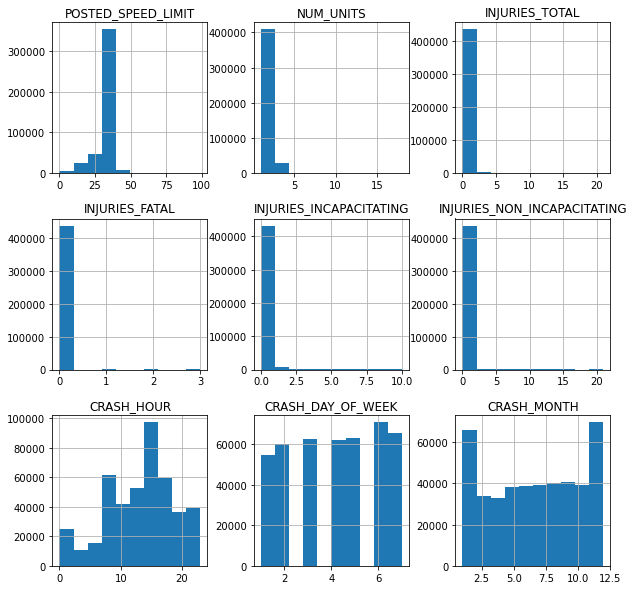

In [239]:
import matplotlib.pyplot as plt
relevant_data[continuous_columns].hist(figsize=(10, 10), bins=10) #plot histograms
plt.show()


Although we currently classify 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', as continuous features, their distributions imply that they represent discrete time periods rather than a continuous range. Each hour, day, and month is a distinct category which may have unique traffic patterns. We will convert these features to categorical

In [240]:
time_col = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']


for col in time_col:
  if col in relevant_data[continuous_columns]:
    categorical_columns.append(col)
    continuous_columns.remove(col)
    relevant_data[col] = relevant_data[col].astype('object')
  else:
    continue
print('Time columns already removed')


print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

Time columns already removed
We now have 22 categorical columns and 6 continuous columns


We can also visualize our continuous columns using boxplots to check for outliers

**2) Boxplots**

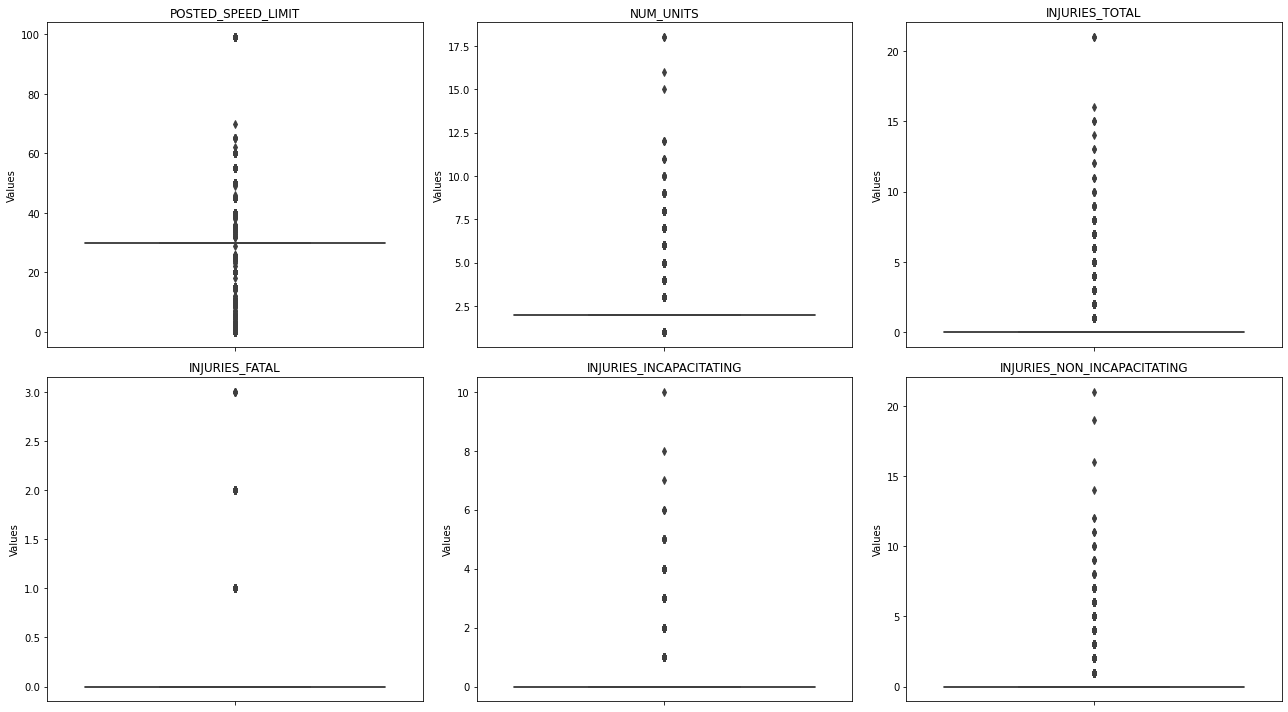

In [241]:
# Create a grid of subplots with 2 rows and 3 columns
n_cols = 3
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))  # create subplots

# Iterate over the continuous columns and plot each one in a separate subplot
for i, col in enumerate(continuous_columns):
    # Get the appropriate subplot
    ax = axes[i // n_cols, i % n_cols]

    sns.boxplot(y=relevant_data[col], ax=ax)

    # Set the title of the subplot
    ax.set_title(col)

    # Set labels for y-axis
    ax.set_ylabel("Values")

# Hide any empty subplots
for i in range(len(continuous_columns), n_rows * n_cols):
    ax = axes[i // n_cols, i % n_cols]
    ax.axis('off')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Looking at the boxplots, our continuous columns appear concentrated in certain values likely due to the nature of the crash data. It seems like there might be a lot of zero values which might give the appearance of categories but the features are actually continuous.

- **POSTED_SPEED_LIMIT:** This is continuous, but there might be common values (e.g., 30, 40 mph) that make it appear categorical.
- **NUM_UNITS:** The number of units (vehicles, people) involved in a crash. This is likely continuous (discrete, but not categorical).
- **INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING:** These are continuous as they count the number of injuries, though they might have many zeroes.

Further, our data does not seem to have any outliers.

**3) Bar Plots**

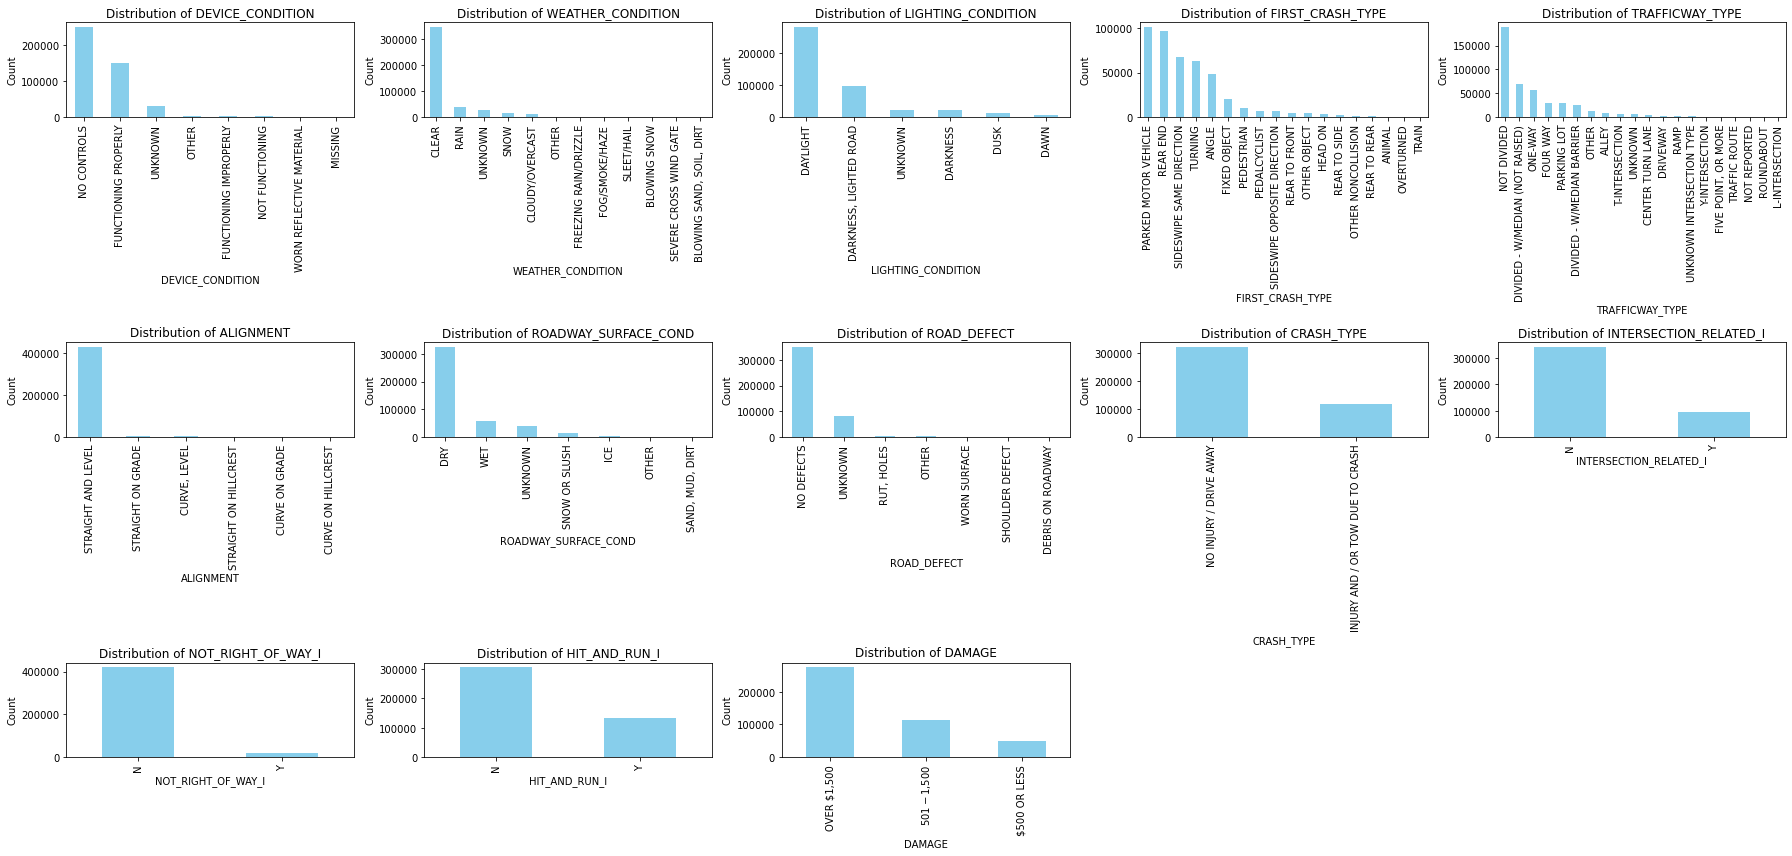

In [242]:
#we will remove location data as it is hard to represent in the plot
if 'LOCATION' in categorical_columns:
  categorical_columns.remove('LOCATION')
else:
  print('Location column already removed')

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[:13]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[:13]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

Location column already removed


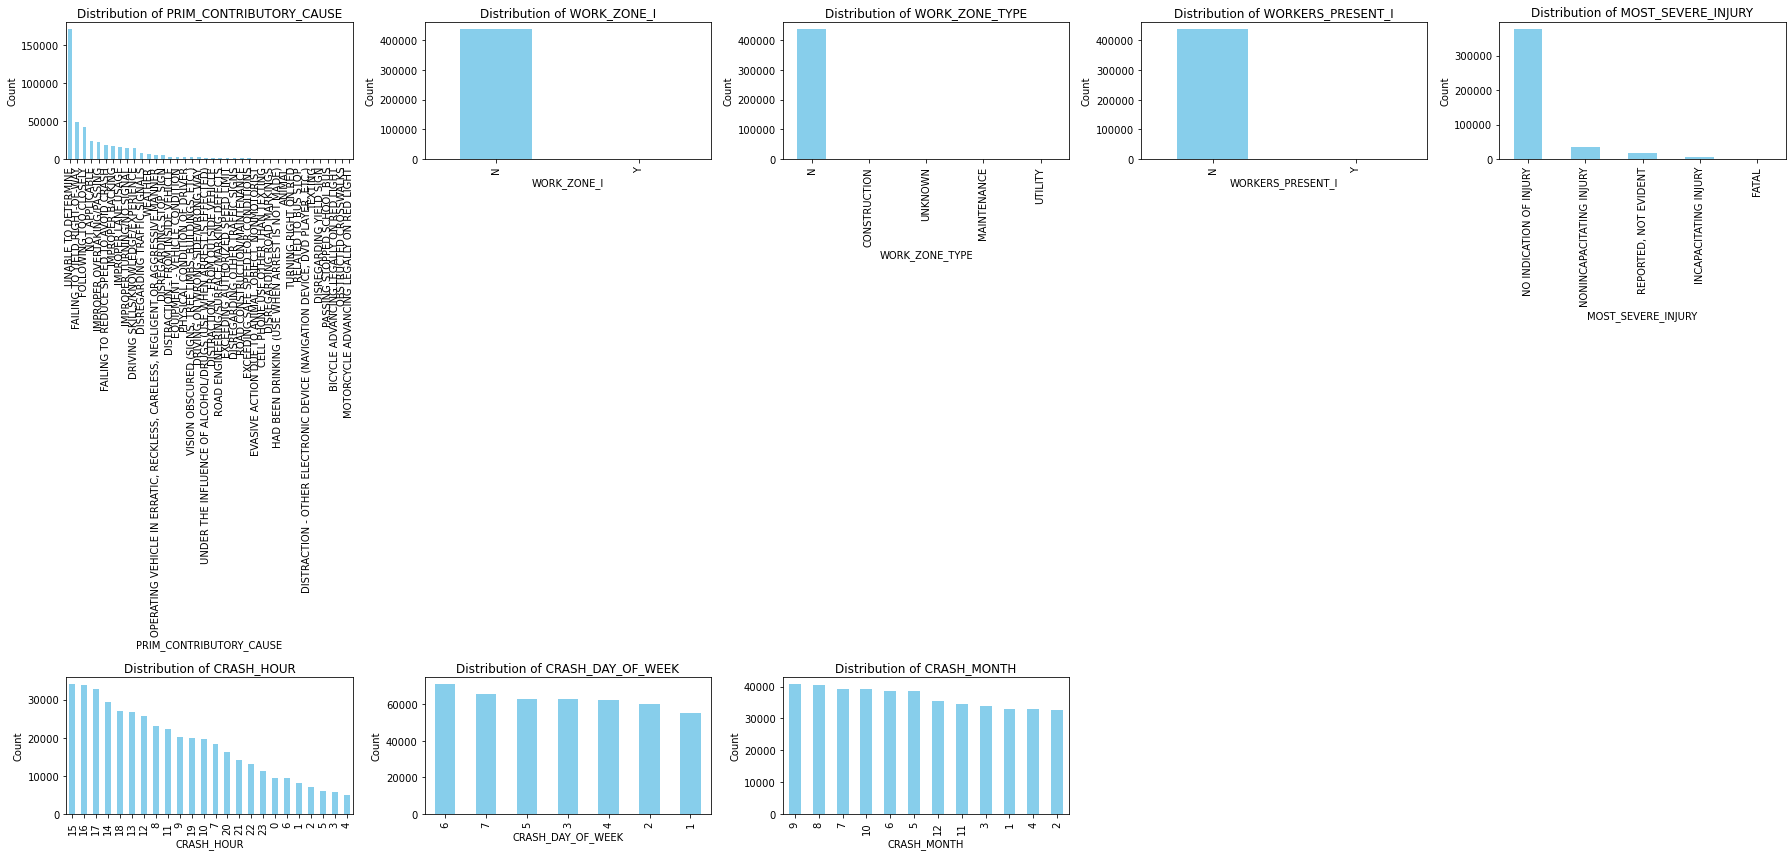

We now have 21 categorical columns and 6 continuous columns


In [243]:
#we will remove location data as it is hard to represent in the plot
if 'LOCATION' in categorical_columns:
  categorical_columns.remove('LOCATION')
else:
  print('Location column already removed')

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[13:]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[13:]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()
print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

### **Specific Observations for Data Understanding and Preparation:**

**High Cardinality:** PRIM_CONTRIBUTORY_CAUSE (target), FIRST_CRASH_TYPE, and TRAFFICWAY_TYPE have many categories.
Suggestion: Use techniques like frequency encoding, target encoding, or feature hashing for these high-cardinality variables.

**Severe Imbalance:** WEATHER_CONDITION, LIGHTING_CONDITION, ROAD_DEFECT, MOST_SEVERE_INJURY are highly imbalanced with one dominant category.We can group rare categories into an "Other" category or use hierarchical categorization if domain knowledge allows.

**Related Variables:** WORK_ZONE_I, WORK_ZONE_TYPE, and WORKERS_PRESENT_I seem related. We can create interaction features or combined categories from these related variables.

**Potential Feature Importance:** DEVICE_CONDITION, WEATHER_CONDITION, LIGHTING_CONDITION, and ROADWAY_SURFACE_COND might be crucial for predicting PRIM_CONTRIBUTORY_CAUSE. 


### **General Modeling Guidelines:**

**Imbalanced Target Variable:** PRIM_CONTRIBUTORY_CAUSE is highly imbalanced. We will use SMOTE, class weighting, or ensemble methods to help counteract this.

**Feature Selection:** Given the high number of categorical variables, feature selection techniques like mutual information could be valuable.

**Model Choice:**  Tree-based models (Random Forest, Gradient Boosting) often handle categorical variables well and can capture complex interactions. For deep learning approaches, We can use entity embeddings. 

**Evaluation Metrics:** Given the imbalanced nature of the target, we will use metrics like F1-score, precision,recall, and AUC instead of just accuracy.

**Cross-validation:** Use stratified k-fold cross-validation to maintain the distribution of the target variable across folds.


### **d) Correlation Analysis**

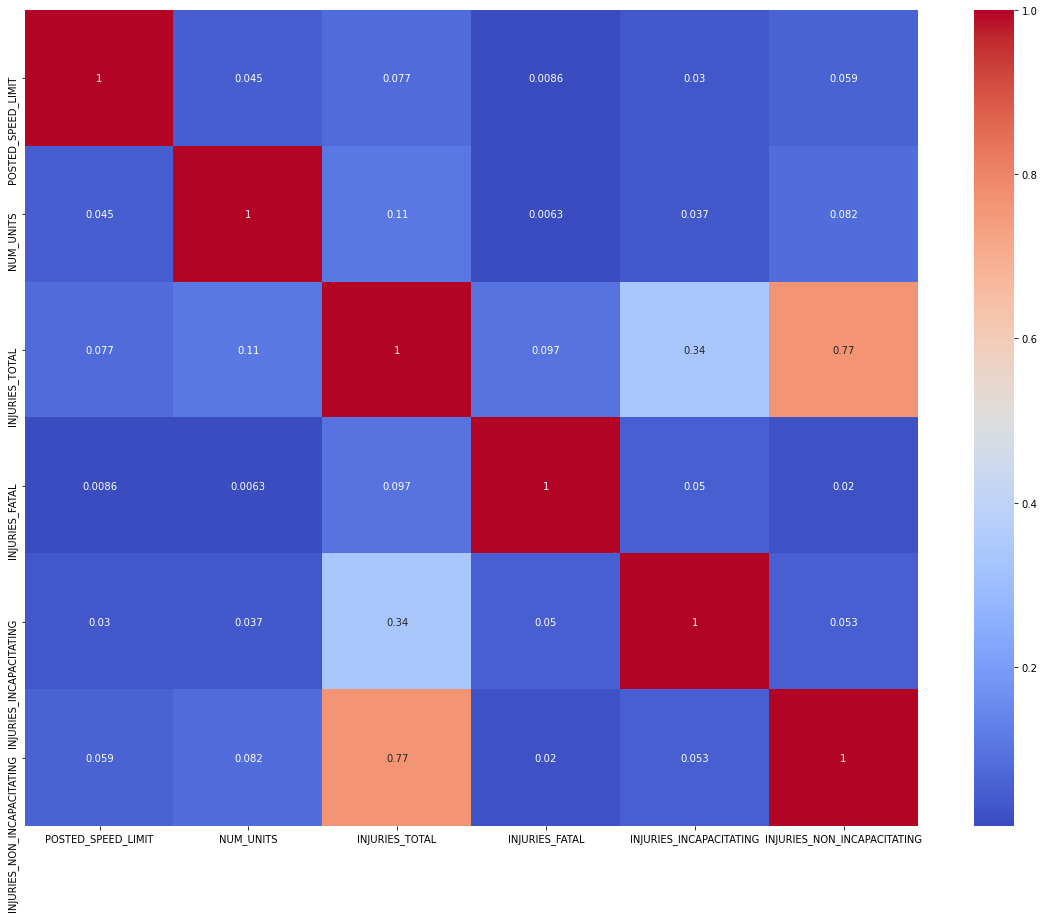

In [244]:

plt.subplots(figsize=(20,15))
sns.heatmap(relevant_data[continuous_columns].corr(),cmap="coolwarm",annot=True);

Our correlation analysis only includes numerical features with only INJURIES_TOTAL and INJURY_NON_INCAPACITATING having high correlation (77%) which is to be expected.

### **e) Encoding**

We will start by splitting our data into a training and test set before proceeding to avoid any data leakage

### **Train Test Split**

In [245]:
X=relevant_data.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y=relevant_data['PRIM_CONTRIBUTORY_CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (307451, 27)
X_test shape: (131766, 27)
y_train shape: (307451,)
y_test shape: (131766,)


In [246]:
print('Summary of Frequency Distribution in our Features\n')


high_cardinality_cols = [column for column in X_train.columns if X_train[column].nunique() > 7 and X_train[column].dtype == 'object' ] #high cardinality features
print('High Cardinality Cols:', high_cardinality_cols)

low_cardinality_cols = [column for column in X_train.columns if X_train[column].nunique() <= 7 and X_train[column].dtype == 'object' ] #low cardinality features
print('Low Cardinality Cols:', low_cardinality_cols)


Summary of Frequency Distribution in our Features

High Cardinality Cols: ['DEVICE_CONDITION', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_HOUR', 'CRASH_MONTH', 'LOCATION']
Low Cardinality Cols: ['LIGHTING_CONDITION', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY', 'CRASH_DAY_OF_WEEK']


In [247]:
for col in X_train.columns:
    print(col, X_train[col].nunique())

POSTED_SPEED_LIMIT 40
DEVICE_CONDITION 8
WEATHER_CONDITION 12
LIGHTING_CONDITION 6
FIRST_CRASH_TYPE 18
TRAFFICWAY_TYPE 20
ALIGNMENT 6
ROADWAY_SURFACE_COND 7
ROAD_DEFECT 7
CRASH_TYPE 2
INTERSECTION_RELATED_I 2
NOT_RIGHT_OF_WAY_I 2
HIT_AND_RUN_I 2
DAMAGE 3
WORK_ZONE_I 2
WORK_ZONE_TYPE 5
WORKERS_PRESENT_I 2
NUM_UNITS 14
MOST_SEVERE_INJURY 5
INJURIES_TOTAL 14
INJURIES_FATAL 4
INJURIES_INCAPACITATING 10
INJURIES_NON_INCAPACITATING 15
CRASH_HOUR 24
CRASH_DAY_OF_WEEK 7
CRASH_MONTH 12
LOCATION 162789


Summary of Frequency Distribution in our Dataset

High Cardinality Columns:
- DEVICE_CONDITION - 8 unique values
- WEATHER_CONDITION - 12 unique values
- FIRST_CRASH_TYPE - 18 unique values
- TRAFFICWAY_TYPE - 20 unique values
- CRASH_HOUR - 24 unique values
- CRASH_MONTH - 12 unique values
- LOCATION -162789 unique values

Low Cardinality Columns:
- LIGHTING_CONDITION - 6 unique values
- ALIGNMENT - 6 unique values
- ROADWAY_SURFACE_COND - 7 unique values
- ROAD_DEFECT - 7 unique values
- CRASH_TYPE - 2 unique values
- INTERSECTION_RELATED_I - 2 unique values
- NOT_RIGHT_OF_WAY_I - 2 unique values
- HIT_AND_RUN_I - 2 unique values
- DAMAGE - 3 unique values
- WORK_ZONE_I - 2 unique values
- WORK_ZONE_TYPE - 5 unique values
- WORKERS_PRESENT_I - 2 unique values
- CRASH_DAY_OF_WEEK - 7 unique values

In [248]:
y_train.nunique()

40

### **Label Encoding**

Our target 'PRIM_CONTRIBUTORY_CAUSE' has 40 unique values whuch have a natural order so we will use label encoding for this.
Label encoding the target variable is crucial because many machine learning algorithms require numeric input. By converting the categorical target into numerical values, we enable algorithms  to interpret and process the target effectively. This step ensures the model can measure relationships between features and target classes accurately, improving the overall performance and interpretability of the model.

In [249]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for the target
le = LabelEncoder()

# Reset the index of y_train and y_test
#y_train = y_train.reset_index(drop=True)
#y_test = y_test.reset_index(drop=True)

# Encode y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create new Pandas Series with the encoded values and the old indexes
y_train = pd.Series(y_train_encoded, index=y_train.index)
y_test = pd.Series(y_test_encoded, index=y_test.index)

y_train.unique()

array([23, 13,  8, 36, 22, 19, 35, 28, 18, 24,  5, 26, 12,  6, 21, 37, 17,
       11,  9, 31, 27, 39, 38, 30,  2, 20,  3, 33,  4, 32, 15, 16, 14, 34,
        0,  7, 29, 10,  1, 25])

In [250]:
y_train.value_counts()

36    119834
18     34166
19     29609
26     16268
23     15376
17     12863
21     11883
22     11038
24     10445
12     10286
6       6102
39      4463
28      3840
5       3423
8       2092
13      1897
30      1766
38      1761
11      1617
37      1464
9       1265
33       720
15       683
3        652
32       609
16       607
14       538
2        415
4        355
20       286
0        273
35       236
31       166
10       157
34       115
7         83
29        40
1         25
27        24
25         9
dtype: int64

#### **Target Encoding**
We will use target encoding to deal with our high cardinality features.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with an outcome related to the values in our target (e.g., No INDICATION OF INJURY), the encoding will reflect that association. Target encoding should not alter the shape of our data

In [109]:
#!pip install category_encoders

In [251]:
from category_encoders import TargetEncoder

#encode the high cardinality features
te = TargetEncoder(cols=high_cardinality_cols) #create encoder instance
te.fit(X_train, y_train_encoded) #fit the encoder
X_train_te = te.transform(X_train) #transfrom X_train
X_test_te = te.transform(X_test)  #transfrom X_test

#assign the transform values into a dataframe
X_train_te_df = pd.DataFrame(X_train_te, columns=X_train[high_cardinality_cols].columns)
X_test_te_df = pd.DataFrame(X_test_te, columns=X_test[high_cardinality_cols].columns)

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(columns=high_cardinality_cols)
X_test = X_test.drop(columns=high_cardinality_cols)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of te df
X_train_te_df = X_train_te_df.reset_index(drop=True)
X_test_te_df = X_test_te_df.reset_index(drop=True)

#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_te_df], axis=1)
X_test = pd.concat([X_test, X_test_te_df], axis=1)

Below we do some tests to check the integrity of our data after target encoding it



In [252]:
X_train.shape

(307451, 27)

In [253]:
X_train.head()

,POSTED_SPEED_LIMIT,LIGHTING_CONDITION,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_DAY_OF_WEEK,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_HOUR,CRASH_MONTH,LOCATION
0,30,DAYLIGHT,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,N,N,"OVER $1,500",...,0.0,0.0,4,23.575021,25.70134,21.502154,26.256185,25.764758,26.135712,25.377110
1,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,N,N,"OVER $1,500",...,0.0,0.0,3,23.575021,25.70134,24.438352,22.377273,25.764758,26.582585,25.797830
2,30,DARKNESS,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",...,0.0,0.0,1,27.330527,25.70134,24.894635,26.256185,25.854597,26.617879,23.776207
3,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",...,0.0,0.0,2,27.330527,25.70134,29.898759,26.256185,26.919511,25.947329,25.727835
4,45,"DARKNESS, LIGHTED ROAD",STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,N,N,"$501 - $1,500",...,0.0,0.0,4,23.575021,25.70134,24.438352,25.198014,26.945747,26.095286,27.299085


In [254]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (307451, 27)
X_test shape: (131766, 27)
y_train shape: (307451,)
y_test shape: (131766,)


### **One Hot Encoding**

One-hot encoding is essential for converting categorical features into a binary matrix representation, where each category is represented as a separate binary column. This process prevents the model from assuming any ordinal relationship between categorical values, which can be misleading when categories have no inherent order (e.g., weather conditions or traffic control devices). By applying one-hot encoding, we ensure that the model treats each category independently, improving its ability to capture the true relationships between features and the target.
We expect one hot encoding to change the shape of our data by increasing the number of features.

In [255]:
from sklearn.preprocessing import OneHotEncoder

#fit the ohe
ohe = OneHotEncoder(handle_unknown="ignore", drop="first")
ohe.fit(X_train[low_cardinality_cols])

#transform our train and test feature set
X_train_ohe = ohe.transform(X_train[low_cardinality_cols])
X_test_ohe = ohe.transform(X_test[low_cardinality_cols])

#assign the transform values into a dataframe
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out(X_train[low_cardinality_cols].columns))
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out(X_test[low_cardinality_cols].columns))

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(low_cardinality_cols, axis=1)
X_test = X_test.drop(low_cardinality_cols, axis=1)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of ohe
X_train_ohe_df = X_train_ohe_df.reset_index(drop=True)
X_test_ohe_df = X_test_ohe_df.reset_index(drop=True)


#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_ohe_df], axis=1 )
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)

X_train.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7
0,30,2,0.0,0.0,0.0,0.0,23.575021,25.70134,21.502154,26.256185,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,30,2,0.0,0.0,0.0,0.0,23.575021,25.70134,24.438352,22.377273,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,30,2,0.0,0.0,0.0,0.0,27.330527,25.70134,24.894635,26.256185,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,2,0.0,0.0,0.0,0.0,27.330527,25.70134,29.898759,26.256185,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,45,2,0.0,0.0,0.0,0.0,23.575021,25.70134,24.438352,25.198014,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [256]:
X_test.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7
0,30,2,0.0,0.0,0.0,0.0,23.575021,25.70134,24.894635,25.380395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,2,0.0,0.0,0.0,0.0,27.330527,25.70134,26.478904,25.198014,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30,1,1.0,1.0,0.0,0.0,29.236512,25.70134,29.587280,25.198014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30,2,0.0,0.0,0.0,0.0,27.330527,25.70134,26.478904,25.380395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,2,0.0,0.0,0.0,0.0,23.575021,25.70134,24.894635,27.822932,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [257]:
print('No. of rows in encoded data:', (X_train.shape[0]+X_test.shape[0]))
print('No. of rows in original data:', (relevant_data.shape[0]))
print(f'No of features in encoded data {X_train.shape[1]} in Train Set and {X_test.shape[1]} in test set:')
print('No. of features in original data:', (relevant_data.drop('MOST_SEVERE_INJURY', axis=1).shape[1]))

No. of rows in encoded data: 439217
No. of rows in original data: 439217
No of features in encoded data 57 in Train Set and 57 in test set:
No. of features in original data: 27


Our data looks ok.

### **f) Correlation Analysis**

Below, we run correlation analysis afresh after encoding our data as this will give us a better representation of the correlation our features have with the target variable since we have a numerical representation of our dataset.

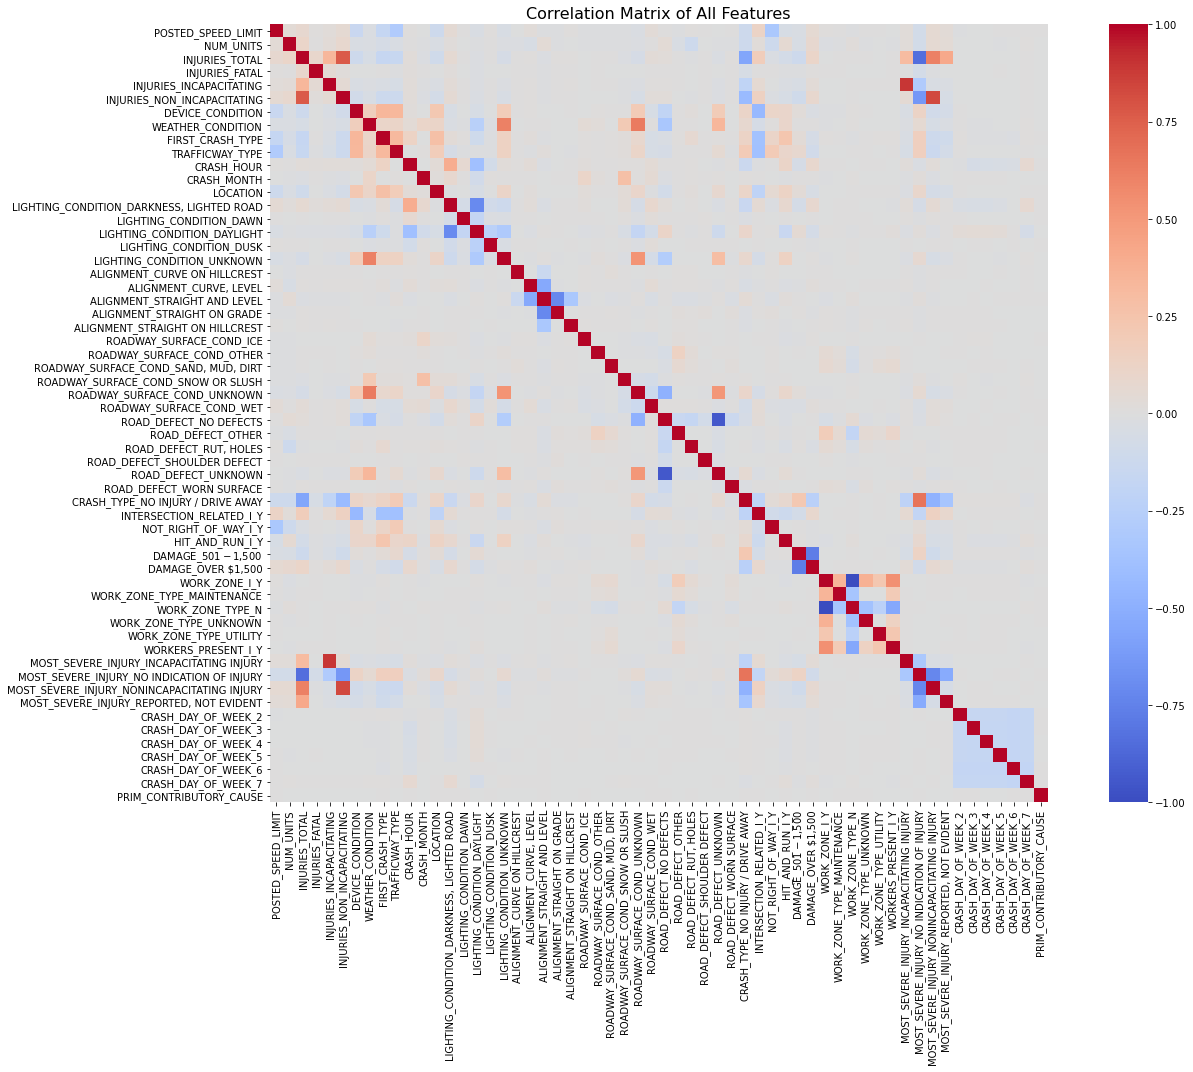

Highly correlated feature pairs:
INJURIES_INCAPACITATING - MOST_SEVERE_INJURY_INCAPACITATING INJURY: 0.90
MOST_SEVERE_INJURY_INCAPACITATING INJURY - INJURIES_INCAPACITATING: 0.90
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - INJURIES_NON_INCAPACITATING: 0.83
INJURIES_NON_INCAPACITATING - MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.83
INJURIES_TOTAL - INJURIES_NON_INCAPACITATING: 0.77
INJURIES_NON_INCAPACITATING - INJURIES_TOTAL: 0.77
MOST_SEVERE_INJURY_NO INDICATION OF INJURY - CRASH_TYPE_NO INJURY / DRIVE AWAY: 0.67
CRASH_TYPE_NO INJURY / DRIVE AWAY - MOST_SEVERE_INJURY_NO INDICATION OF INJURY: 0.67
WEATHER_CONDITION - ROADWAY_SURFACE_COND_UNKNOWN: 0.64
ROADWAY_SURFACE_COND_UNKNOWN - WEATHER_CONDITION: 0.64
WEATHER_CONDITION - LIGHTING_CONDITION_UNKNOWN: 0.62
LIGHTING_CONDITION_UNKNOWN - WEATHER_CONDITION: 0.62
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - INJURIES_TOTAL: 0.61
INJURIES_TOTAL - MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.61
WORKERS_PRESENT_I_Y - WORK_ZONE_I_Y: 0.

In [258]:
def analyze_and_plot_correlations(df, threshold=0.5, target=None):
    # Compute correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of All Features', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Get high correlations
    high_corrs = corr_matrix.unstack()
    high_corrs = high_corrs[(abs(high_corrs) > threshold) & (abs(high_corrs) < 1.0)]
    high_corrs = high_corrs.sort_values(ascending=False).reset_index()
    high_corrs.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Print highly correlated feature pairs
    print("Highly correlated feature pairs:")
    for _, row in high_corrs.iterrows():
        print(f"{row['Feature 1']} - {row['Feature 2']}: {row['Correlation']:.2f}")

    # Focus on specific feature correlations if provided
    if target is not None:
        target_corrs = corr_matrix[target]
        target_corrs = target_corrs[(abs(target_corrs) > threshold) & (abs(target_corrs) < 1.0)]
        target_corrs = target_corrs.sort_values(key=abs, ascending=False)

        print(f"\nFeatures highly correlated with {target}:")
        for feat, corr in target_corrs.items():
            print(f"{feat}: {corr:.2f}")


X_train_plus_target = pd.concat([X_train, y_train.rename('PRIM_CONTRIBUTORY_CAUSE')], axis=1) #add back y_train to X_train to perform correlation analysis

analyze_and_plot_correlations(X_train_plus_target, threshold=0.5, target='PRIM_CONTRIBUTORY_CAUSE')


Our data is ready for modeling. We have several highly correlated features which is expected after One Hot Encoding. We will keep the unrelated features in mind when we are modeling to prevent the effects of multicollinearity.E.g. we may neeed to use Lasso or Ridge to handle multicollinearity by shrinking the coefficients of correlated variables or use Principal Component Analysis to transform the feature space into a smaller set of uncorrelated variable which will also help in reducing dimensionality.

Additionally, we have one feature that is highly correlated to our target: LOCATION. We should look out for the importance of this feature when we do our modeling.

# 4. Modeling

In [261]:
#import necessary packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from keras import models, layers, optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA


### **1) Baseline Model: Dummy Classifier**

In [262]:
# Fit the DummyClassifier (baseline model)
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train_reduced, y_train)

# Predict using the baseline model on the test set
y_pred_baseline = dummy_clf.predict(X_test)

# Calculate accuracy score
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nBaseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE'].unique()));

Baseline Model Accuracy: 0.3915

Baseline Model Classification Report:
                                                                                  precision    recall  f1-score   support

                                                                  NOT APPLICABLE       0.00      0.00      0.00       123
                                                             UNABLE TO DETERMINE       0.00      0.00      0.00        20
                                             DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.00      0.00      0.00       161
                                                                IMPROPER BACKING       0.00      0.00      0.00       290
                               EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST       0.00      0.00      0.00       160
                                                                         WEATHER       0.00      0.00      0.00      1373
                                                     IMPROPER OVERTAKING/P

**Summary of Findings from the Baseline Dummy Classifier**

The baseline model, a dummy classifier, achieved an **accuracy** of **39.15%** mainly driven by the class TEXTING prevalence in the dataset

**Performance Across Classes:** The model exhibited a significant performance disparity across classes. Notably, the only class with non-zero predictions was TEXTING, which had:
- Precision: 0.39
- Recall: 1.00
- F1-score: 0.56

**Zero Predictions:** All other classes received a precision, recall, and F1-score of 0.00, indicating that the model failed to predict any instances correctly for those categories.
The F1-score (0.01) demonstrates that the model struggles significantly across the different classes.

### **2) Logistic Regression**

The performance of the baseline dummy classifier highlights the need for a more robust modeling approach, such as Logistic Regression, which is capable of learning from the feature set and identifying patterns that the dummy model failed to capture.

In [263]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9, svd_solver='full')  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42) #instaniate our logistic regression model

logreg.fit(X_train_pca, y_train)

y_pred = logreg.predict(X_test_pca)



In [264]:
# Calculate accuracy score
accuracy_baseline = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nLogistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE'].unique()));


Logistic Regression Model Accuracy: 0.3682

Logistic Regression Model Classification Report:
                                                                                  precision    recall  f1-score   support

                                                                  NOT APPLICABLE       0.00      0.00      0.00       123
                                                             UNABLE TO DETERMINE       0.00      0.00      0.00        20
                                             DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.00      0.00      0.00       161
                                                                IMPROPER BACKING       0.00      0.00      0.00       290
                               EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST       0.00      0.00      0.00       160
                                                                         WEATHER       0.00      0.00      0.00      1373
                                                    

In [183]:
relevant_data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 171422
FAILING TO YIELD RIGHT-OF-WAY                                                        48644
FOLLOWING TOO CLOSELY                                                                42318
NOT APPLICABLE                                                                       23220
IMPROPER OVERTAKING/PASSING                                                          21903
FAILING TO REDUCE SPEED TO AVOID CRASH                                               18431
IMPROPER BACKING                                                                     17060
IMPROPER LANE USAGE                                                                  15667
IMPROPER TURNING/NO SIGNAL                                                           14885
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  14871
DISREGARDING TRAFFIC SIGNALS                                                          8669

In [182]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming y_train is your original target variable
le = LabelEncoder()

# Fit the encoder on the target
y_train_encoded = le.fit_transform(y_train)

# Create a mapping of original values to encoded values
mapping = dict(zip(le.classes_, range(len(le.classes_))))

# Display the mapping
print(mapping)




{'ANIMAL': 0, 'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 1, 'CELL PHONE USE OTHER THAN TEXTING': 2, 'DISREGARDING OTHER TRAFFIC SIGNS': 3, 'DISREGARDING ROAD MARKINGS': 4, 'DISREGARDING STOP SIGN': 5, 'DISREGARDING TRAFFIC SIGNALS': 6, 'DISREGARDING YIELD SIGN': 7, 'DISTRACTION - FROM INSIDE VEHICLE': 8, 'DISTRACTION - FROM OUTSIDE VEHICLE': 9, 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 10, 'DRIVING ON WRONG SIDE/WRONG WAY': 11, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 12, 'EQUIPMENT - VEHICLE CONDITION': 13, 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 14, 'EXCEEDING AUTHORIZED SPEED LIMIT': 15, 'EXCEEDING SAFE SPEED FOR CONDITIONS': 16, 'FAILING TO REDUCE SPEED TO AVOID CRASH': 17, 'FAILING TO YIELD RIGHT-OF-WAY': 18, 'FOLLOWING TOO CLOSELY': 19, 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 20, 'IMPROPER BACKING': 21, 'IMPROPER LANE USAGE': 22, 'IMPROPER OVERTAKING/PASSING': 23, 'IMPROPER TURNING/NO SIGNAL': 24, 'MOTORCYCLE ADVANCING LEG

Or logistic regression model does not perform any better, with a lower accuracy score of **36.60%** compared to 39.15% in our dummy classifer possibly due to class imbalance

In [56]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.5672
Confusion Matrix:
[[ 1873  5611  9779]
 [ 2012 14810 23218]
 [ 3449 22463 70511]]
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.11      0.15     17263
           1       0.35      0.37      0.36     40040
           2       0.68      0.73      0.71     96423

    accuracy                           0.57    153726
   macro avg       0.43      0.40      0.40    153726
weighted avg       0.55      0.57      0.55    153726



In [57]:
import xgboost as xgb

# Convert your data into DMatrix format, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(y.unique()),   # Number of classes
    'max_depth': 6,                 # Maximum depth of the tree
    'eta': 0.3,                     # Learning rate
    'subsample': 0.8,               # Subsample ratio
    'colsample_bytree': 0.8,        # Column sample ratio
    'seed': 42                      # Random seed
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print('Confusion Matrix:')
print(conf_matrix_xgb)
print('Classification Report:')
print(class_report_xgb)


XGBoost Accuracy: 0.5469
Confusion Matrix:
[[ 1643  7626  7994]
 [ 1648 18749 19643]
 [ 3163 29581 63679]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.10      0.14     17263
           1       0.34      0.47      0.39     40040
           2       0.70      0.66      0.68     96423

    accuracy                           0.55    153726
   macro avg       0.43      0.41      0.40    153726
weighted avg       0.55      0.55      0.54    153726



Num GPUs Available:  1
Epoch 1/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7533 - loss: 0.6102 - val_accuracy: 0.7774 - val_loss: 0.5318
Epoch 2/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7755 - loss: 0.5452 - val_accuracy: 0.7801 - val_loss: 0.5236
Epoch 3/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7750 - loss: 0.5370 - val_accuracy: 0.7767 - val_loss: 0.5127
Epoch 4/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7774 - loss: 0.5206 - val_accuracy: 0.7810 - val_loss: 0.4941
Epoch 5/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7809 - loss: 0.5059 - val_accuracy: 0.7839 - val_loss: 0.4892
Epoch 6/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7812 - loss: 0.5004 - val_accuracy: 0.7814 - val_loss: 0.4798
Epoch 7/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7807 - loss: 0.4971 - val_accuracy: 0.7848 - val_loss: 0.4764
Epoch 8/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - acc

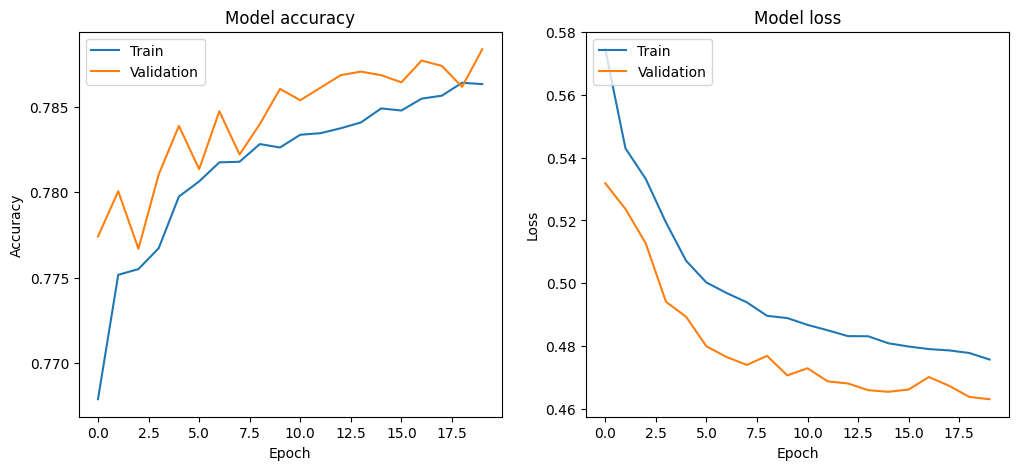

In [58]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))




# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create a Sequential model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(len(y.unique()), activation='softmax'))  # Use softmax for multi-class classification
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              optimizer='adam',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)
# Make predictions
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=-1)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print(f'Neural Network Accuracy: {accuracy_nn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline # Import Pipeline from imblearn

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Create a pipeline using imblearn's Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE()),  # Apply SMOTE
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, class_report

In [60]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Initialize a results dictionary to store outcomes
results = {}

for model_name, model in models.items():
    accuracy, conf_matrix, class_report = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:44:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [63]:
# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))


def evaluate_neural_network(X_train, y_train, X_test, y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the model
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))  # Update number of classes

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_scaled, y_train, epochs=30, batch_size=32)

    # Predict and evaluate
    y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=-1)

    accuracy = accuracy_score(y_test, y_pred_nn)
    conf_matrix = confusion_matrix(y_test, y_pred_nn)
    class_report = classification_report(y_test, y_pred_nn)

    return accuracy, conf_matrix, class_report

# Evaluate Neural Network
nn_accuracy, nn_conf_matrix, nn_class_report = evaluate_neural_network(X_train, y_train, X_test, y_test)
results['Neural Network'] = {
    'Accuracy': nn_accuracy,
    'Confusion Matrix': nn_conf_matrix,
    'Classification Report': nn_class_report
}


Num GPUs Available:  1
4804/4804 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [64]:
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*50 + "\n")


Logistic Regression Accuracy: 0.5033
Confusion Matrix:
[[ 3836  8028  5399]
 [ 4119 21159 14762]
 [ 7263 36778 52382]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.22      0.24     17263
           1       0.32      0.53      0.40     40040
           2       0.72      0.54      0.62     96423

    accuracy                           0.50    153726
   macro avg       0.43      0.43      0.42    153726
weighted avg       0.56      0.50      0.52    153726



Random Forest Accuracy: 0.5414
Confusion Matrix:
[[ 2648  7316  7299]
 [ 2837 18866 18337]
 [ 4828 29881 61714]]
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.15      0.19     17263
           1       0.34      0.47      0.39     40040
           2       0.71      0.64      0.67     96423

    accuracy                           0.54    153726
   macro avg       0.43      0.42      0.42    153726
weighted avg 

# 5. Model Validation

# 6. Conclusion and Summary